# Useful Function for Data Analysis

In [1]:
# Importing basic functions
import pandas as pd
import missingno as mano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt 
import statistics as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro# Importing basic functions
import pandas as pd
import missingno as mano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt 
import statistics as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import matplotlib
from matplotlib.pyplot import figure
# Importinf Clasification Regression Related Functions
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn import metrics
import xgboost as xgb
# This function read data from excel and csv files to dataframe.
# Input Arguments file: File name with path (Eg: 'D:/data/dataread.csv'), f_type: File Type (Eg: 'csv',default csv)
def file_todataframe(file,f_type):
    if f_type == 'csv':  
        return pd.read_csv(file)
    elif f_type == 'excel': 
        return pd.read_excel(file)
    elif f_type == 'json': 
        return pd.read_json(file)
    
# This function display shape, data type, data near head and tail of given data fram.
# Input Arguments df: dataframe, n: No f data points to display
def df_details(d_f,n):
    print('Data Types of Column: \n',d_f.dtypes)
    print('\n Size of Datarame: ',d_f.shape)
    print('\n Top and bottom ',n,' rows: \n')
    display(d_f.head(n).append(d_f.tail(n)))

# This function drops irrelevant columns
# Input Arguments df: dataframe, col_del: Value or index array of column to delete (Eg: [1,3,5] or ['Names',Sales]), 
# typ: 1 for column index and 0 for column name in col_del
def col_drop(d_f,col_del,typ=0):
    if typ == 0:
        d_f = d_f.drop(col_del,axis=1)
    elif typ == 1:
        d_f = d_f.drop(df.columns[col_del],axis=1)
    return d_f

# This function drops rows with particular column values
# Input Arguments df: dataframe, row_del: Delete if row with given value,
# col_ref: Name of column to check for row values (Eg:['Names']), 
def row_drop(d_f,row_del,col_ref):
    d_f = d_f.drop(d_f[d_f[col_ref] == row_del].index)
    return d_f

# This function give deatials for missing values in data
# Input Arguments df: dataframe
def miss_ch(d_f):
    print('Available data with no nulls: ', d_f.dropna().shape[0])
    display('Deatils of Null values column wise',d_f.isnull().sum())
    
# This function give deatials for missing values in data
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# graph: Types of graph to display. (Eg: ['bar','matrix','heatmap','dendrogram'],['all'] default 'all')
def miss_viz(d_f,col_int = 'all',graph = 'all'):
    import missingno as mano
    av_gp = ['bar','matrix','heatmap','dendrogram']
    col_nam = d_f.columns
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    if graph == 'all':
        graph = av_gp
    elif not all(i in av_gp for i in graph):
        print("Invalid Graph type, select 'bar','matrix','heatmap','dendrogram'")
        return
    
    for gp in graph:
        getattr(mano, gp)(d_f[col_int])

# This function fill missing values
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# metd: Types of graph to display. (Option: {0(float),‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, 'linear'} default None)
def fill_miss(d_f,col_int = 'all',metd = None):
    col_nam = d_f.columns
    av_method = ['backfill', 'bfill', 'pad', 'ffill', 'linear']
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    
    if metd == None:
        return d_f
    elif (type(metd) == int) | (type(metd) == float):
        print('yes')
        return d_f[col_int].fillna(metd)  
    elif metd == 'linear':
        return d_f[col_int].interpolate(method = 'linear') 
    elif  metd in av_method:
        return d_f[col_int].fillna(method = 'ffill')
    else:
        print("Invalid fill type")
        return d_f

# Function for Numerical Data Analysis
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# func: Types of graph and function. (Option: {'distplot','boxpot','scatterplot','describe','normality'} default all)
def data_num(d_f,col_int = 'all',func = 'all',scat = None):
    from scipy.stats import shapiro
    from statsmodels.graphics.gofplots import qqplot
    av_func = ['hist','boxplot','scatter','describe','normality']
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_nam = d_f.select_dtypes(include=numerics).columns
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    #Checking Parameter available function
    if func == 'all':
        func = av_func
    elif not all(i in av_gp for i in graph):
        print("Invalid Graph type, select 'distplot','boxpot','scatterplot','describe','normality'")
        return
    if scat is None:
        scat = df.columns[0]
    
    
    for fn in func:
        if fn == 'describe':
            display("Statictical Details",df[col_int].describe())
        else:
            for col in col_int:
                if fn == 'normality':
                    #qqplot(df[col])
                    print("Normality Test for: ",col)
                    stat, p = shapiro(df[col])
                    if p > 0.05:
                        print('Sample looks Gaussian. Statistics=%.3f, p=%.3f'% (stat, p))
                    else:
                        print('Sample does not look Gaussian. Statistics=%.3f, p=%.3f'% (stat, p))
                elif fn == 'scatter':
                    display(col)
                    plt.scatter(df[col],df[scat])  
                    plt.show()
                else:
                    display(col)
                    getattr(plt, fn)(df[col])   
                    plt.show()
                    
# Function for Categorical Data Analysis
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all')
def data_cat(d_f,col_int = 'all',bar = None):
    import matplotlib.pyplot as plt
    col_nam = d_f.select_dtypes(include=['object','category']).columns
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_num = d_f.select_dtypes(include=numerics).columns   
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 

    if not ((bar in col_num) | (bar is None)):
        print("Only numeric column for Bar")
        return 
    if not (bar is None):
        for col in col_int:
            plt.figure(figsize=(8,5))
            plt.bar(d_f[col], d_f[bar])
            plt.show()
        return
    for col in col_int:
        plt.suptitle(col)
        d_f[col].value_counts().plot(kind='bar')
        plt.show()

# Function for Canging column type
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# dtyp: New data types of coloumn default int
def col_dtype(d_f,col_int,dtyp = int):
    d_f = deep_copy(d_f)
    av_fun = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','int','float','str','category']
    col_nam = d_f.columns
    #Checking Parameter Column names
    if not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    #Checking Parameter available function
    if not dtyp in av_fun:
        print("Invalid data type")
        return d_f
    
    d_f[col_int] = d_f[col_int].astype(dtyp,errors='ignore')
    return d_f

# Function for Canging column type
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# opr: Operation to be performed on coloumn values, val = [old value, new value]
def col_opre(d_f,col_int,opr = None,val = None):
    col_nam = d_f.select_dtypes(include=['object']).columns
    av_opr = ['str_replace','rm_space','chg_value']
    
    #Checking Parameter Column names
    if not (col_int in col_nam):
        print("Invalid column name")
        return d_f

    if opr == 'str_replace':
        d_f[col_int] = d_f[col_int].str.replace(val[0], val[1])
        return d_f
    elif opr == 'rm_space':
        d_f[col_int] = d_f[col_int].str.replace(' ', '')
        return d_f
    elif opr == 'chg_value':
        d_f[col_int] = d_f[col_int].replace(val[0], val[1])
        return d_f
    else:
        print("Invalid Opeation")
        return d_f
    
# Function for Performing numerical operations to column values
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# opr: Operation to be performed on coloumn values, val: value to apply on column
def col_opre(d_f,col_int = 'all',opr = None,val = None):
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]
    col_num = d_f.select_dtypes(include=numerics).columns  


    if opr == 'add':
        d_f[col_int] = d_f[col_int]+val
        return d_f
    elif opr == 'sub':
        d_f[col_int] = d_f[col_int]-val
        return d_f
    elif opr == 'mul':
        d_f[col_int] = d_f[col_int]*val
        return d_f
    elif opr == 'div':
        d_f[col_int] = d_f[col_int]/val
        return d_f
    else:
        print("Invalid Opeation")
        return d_f

# Function for creating a deep copy
# Input Arguments df: dataframe, Output data frame copy
def deep_copy(d_f):
    return d_f.copy(deep=True)

# Function for coding Categorical variable  to Numeric
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'{must be string}), 
# coding_type: Coding type to apply{'label','binary','ordinal','onehot'} default,label, contain: For binary
def cat_num(d_f,col_int,coding_type = 'label',contain=None,X = None):
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
    d_f = deep_copy(d_f)
    col_nam = d_f.select_dtypes(include=['object']).columns
    if not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    else: 
        d_f[col_int] =  d_f[col_int].astype('str')
        
    if coding_type == 'label':
        for col in col_int:
            d_f[col] = d_f[col].astype('category')
            d_f[col] = d_f[col].cat.codes
        return d_f
    elif coding_type == 'binary':
        for col in col_int:
            d_f[col] = np.where(d_f[col].str.contains(contain), 1, 0)
        return d_f
    elif coding_type == 'ordinal':
        for col in col_int:
            ord_enc = OrdinalEncoder()
            d_f[col] = ord_enc.fit_transform(d_f[[col]])
        return d_f
    elif coding_type == 'onehot':
        for col in col_int:
            temp = pd.get_dummies(d_f[col], prefix=col)
            d_f = d_f.join(temp)
            d_f = col_drop(d_f,col)
        return d_f
    else:
        display("Invalid Ending Method")
        return d_f
    
# This function scatter Plot
# Input Arguments df: dataframe, col_int: Two columns of intrest (Eg: ['Sale','Customer'],['all']), 
def scatter_plot(d_f,col_int = None):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_nam = d_f.select_dtypes(include=numerics).columns
    if (col_int is None) & (not all(i in col_nam for i in col_int)) & (len(col_int) != 2):
        print("Invalid column name")
        return 
    x = d_f[col_int[0]]
    y = d_f[col_int[1]]
    xv = col_int[0]+' X- Value'
    yv = col_int[1]+' Y- Value'
    tit = col_int[0] + ' vs ' + col_int[1] +' Scatter plot'

    plt.scatter(x, y)
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(tit)
    plt.xlabel(xv)
    plt.ylabel(yv)
    plt.show()

# Function for applyng Machine learning Models
# Input Arguments df with last raw as labels, task: regression or classification, algo: Descion Tree or Random Forest
def anova(d_f,col_int='all',col_main=None):
    from scipy import stats
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]
    col_num = d_f.select_dtypes(include=numerics).columns 
    
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    for col in col_int:
        model = ols(col_main+'~ C(Q("'+col+'"))', data=d_f).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print ("\nAnova =>",col_main," - ",col)
        display(anova_table)

## T Test
def t_test(d_f,col_ind=[1,2]):
    data1 = d_f.iloc[:,col_ind[0]].values
    data2 = d_f.iloc[:,col_ind[1]].values
    # calculate means
    mean1, mean2 = st.mean(data1), st.mean(data2)
    # calculate sample standard deviations
    std1, std2 = st.stdev(data1), st.stdev(data2)
    # calculate standard errors
    n1, n2 = len(data1), len(data2)
    se1, se2 = std1/mt.sqrt(n1), std2/mt.sqrt(n2)
    # standard error on the difference between the samples
    sed = mt.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    print('T Test Statistics=%.3f' % (t_stat))

## Normality Test
def norm(d_f,col_ind=[1]):
    for col in col_ind:
        data = d_f.iloc[:,col]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        data.hist()
        
# This function Correlation Heat Map
# Input Arguments d_f: dataframe
def corr_hmap(d_f):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(15,8)})
    corr = d_f.corr().dropna(1,'all').dropna(0,'all')
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    );
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
        horizontalalignment='right'
    );    

# Function for applyng Machine learning Models
# Input Arguments df with last raw as labels, task: regression or classification, algo: Descion Tree or Random Forest
def ml_algo(X_train, X_test, y_train, y_test,algo = 'decisiontree',task = 'Reg',n=3):

    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    if task == 'Reg':
        if algo == 'decisiontree':
            model = DecisionTreeRegressor(max_depth=n)

        elif algo == 'randomforest':
            model = RandomForestRegressor(n_estimators = n, random_state = 42)
            
        elif algo == 'knn':
            model = KNeighborsRegressor(n_neighbors=n)
            
        elif algo == 'lreg':
            model = LinearRegression()
            
        elif algo == 'svm':
            model = SVR(kernel="rbf")
            
        elif algo == 'gboost':
            model = GradientBoostingRegressor()
            
        elif algo == 'adaboost':
            model = AdaBoostRegressor(random_state=0, n_estimators=100)
            
        else:
            print("Invalid Algorithm")
            return  
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r_2 = r2_score(y_test, y_pred)
        r_2adj = r2_score(y_test, y_pred,multioutput='variance_weighted')
        return mae,mse,r_2,r_2adj,model
        
    elif task == 'Class':    
        if algo == 'decisiontree':
            model = DecisionTreeClassifier(max_depth=n) 
        
        elif algo == 'randomforest':
            model=RandomForestClassifier(n_estimators=n)
            
        elif algo == 'knn':
            model = KNeighborsClassifier(n_neighbors=n)
            
        elif algo == 'gboost':
            model = GradientBoostingClassifier()
            
        elif algo == 'adaboost':
            model = AdaBoostClassifier(n_estimators=100, random_state=0)
            
        elif algo == 'svc':
            model = svm.SVC()
            
        elif algo == 'naive':
            model = GaussianNB()
            
        elif algo == 'xgboost':
            model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
            
        elif algo == 'mlp':
            model = MLPClassifier(hidden_layer_sizes=5)
            
        elif algo == 'logit':
            model = LogisticRegression()            
        else:
            print("Invalid Algorithm")
            return
        

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        c_m =confusion_matrix(y_test, y_pred)
        c_r = classification_report(y_test, y_pred)
        acc_sc = accuracy_score(y_test, y_pred)

        fpr , tpr, _ = roc_curve(y_test, y_pred)
        auc_roc = metrics.auc(fpr, tpr)
        
        logloss = log_loss(y_test, y_pred)       
        #Precision
        pre_l = precision_score(y_test, y_pred)*100
        #Recall
        recall_l = recall_score(y_test, y_pred)*100
        return c_m,c_r,acc_sc,auc_roc,logloss,model,pre_l,recall_l
    
# Data frame with output variable at first location
# f_s features to select
def feature_selectk(d_f,f_s,col):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    from sklearn.model_selection import train_test_split

    x = col_drop(d_f,col,typ=0)
    y = d_f[col]
    fs = SelectKBest(score_func=f_classif, k=f_s)
    # learn relationship from training data
    fs.fit(x, y)
    # transform train input data
    x_fs = fs.transform(x)
    return x_fs,y,fs

def feature_select_rffs(x,y,reg=True):
    from sklearn.feature_selection import SelectFromModel
    if reg:
        sel = SelectFromModel(RandomForestRegressor(n_estimators = 50))
    else:
        sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
    sel.fit(x, y)
    selected_feat= x.columns[(sel.get_support())]
    return selected_feat

def importantfeat_rffs(d_f,reg=True): 
    # random forest for feature importance on a regression problem
    from sklearn.datasets import make_regression
    from sklearn.ensemble import RandomForestRegressor
    from matplotlib import pyplot
    # define dataset
    X = d_f.iloc[:,1:len(d_f.columns)]
    y = d_f.iloc[:,:1]
    # define the model
    model = RandomForestRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.xticks(range(1,len(importance)),df.iloc[:,1:len(df)-1].columns,rotation=90)
    pyplot.show()
    
# kfoldtype = KFold , StratifiedKFold
def ml_algo_cv(X,y,algo = 'decisiontree',task = 'Reg',n=3,split=10,kftype ='skfold'):
    accf = 0
    aucf = 0
    pref = 0
    recallf = 0
    i= 0
    if kftype == 'skfold':
        kf = StratifiedKFold(n_splits=split, random_state=None, shuffle=False)
    elif kftype == 'kfold':
        kf = KFold(n_splits=split, random_state=None, shuffle=False)
        
    for train_index, test_index in kf.split(X,y):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        cm,cr,acc,auc,ll,mdl,pre,recall = ml_algo(trainX, testX, trainY, testY,algo = algo ,task = task,n=3)
        accf = accf + acc
        aucf = aucf + auc
        pref = pref + pre
        recallf = recallf + recall 
        i = i + 1
    accf = accf/i
    aucf = auc/i
    pref = pref/i
    recallf = recallf/i
    return accf,aucf,pref,recallf,cm

## Upsampling minority class and down sampling majority class 
def class_imbalance(d_f,resmpl=0.75,minor=0,col=None):
    df_majority = row_drop(df,minor+1,col[0])
    df_minority = row_drop(df,minor,col[0])
    resmplc = mt.ceil(mt.ceil(df[col].value_counts()[minor]* 0.75) * resmpl)
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=resmplc,    # to match majority class
                                     random_state=123) # reproducible results
    df_majority_under = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=resmplc,    # to match majority class
                                 random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_smp = pd.concat([df_majority_under, df_minority_upsampled])
    # Display new class counts
    #print(df_smp[col].value_counts())
    return df_smp
## Upsampling minority class and down sampling majority class 
def class_imbalance_no(d_f,minr,maj,minor=0,col=None):
    df_majority = row_drop(df,minor+1,col[0])
    df_minority = row_drop(df,minor,col[0])
  
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=minr,    # to match majority class
                                     random_state=123) # reproducible results
    df_majority_under = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=maj,    # to match majority class
                                 random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_smp = pd.concat([df_majority_under, df_minority_upsampled])
    # Display new class counts
    #print(df_smp[col].value_counts())
    return df_smp

def con_mat(con_mat,lab = ['x-label','y-label']):
    import seaborn as sns
    import matplotlib.pyplot as plt   
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", ax = ax,cmap="YlGnBu"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([lab[0],lab[1]]); ax.yaxis.set_ticklabels([lab[0],lab[1]]);

# FS: Feature Selection
# CV: Cross Validiation
# CI: CLass Imbalance
def ml_com(d_f,colum,algor='decisiontree',fs=True,cv=True,ci=True,resmpl = 0.75):
    x = col_drop(d_f,colum,typ=0)
    y = d_f[colum]
    if fs & cv & ci:
        df_samp = class_imbalance(d_f,resmpl = resmpl,minor=0,col=colum)
        fet = feature_select_rffs(x,y,reg=False)
        x = col_drop(df_samp,colum,typ=0)
        x = x[fet]
        y = df_samp[colum]
        acc,auc,pre,recall,cm = ml_algo_cv(x,y,algo = algor,task = 'Class',n=3,split=10,kftype ='skfold')
        
    elif fs & ~cv & ~ci:
        fet = feature_select_rffs(x,y,reg=False)
        x = col_drop(d_f,colum,typ=0)
        x = x[fet]
        y = d_f[colum]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)
    elif ~fs & ~cv & ci:
        df_samp = class_imbalance(d_f,resmpl = resmpl,minor=0,col=colum)
        x = col_drop(df_samp,colum,typ=0)
        y = df_samp[colum]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)
    elif ~fs & ~cv & ~ci:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)

    return acc,auc,pre,recall,cm

# EDA on Stroke Prediction Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading File
df =  file_todataframe('health.csv','csv')

In [4]:
#Data Details
df_details(df,3)

Data Types of Column: 
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

 Size of Datarame:  (5110, 12)

 Top and bottom  3  rows: 



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
#Checking if any missing values
miss_ch(df)

Available data with no nulls:  4909


'Deatils of Null values column wise'

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# As per my background knowledge BMI would be one of the main indicators in predicting stroke so these must be filled and as 
# our dataset is already small droping these may affect the results.
# So filling missing BMI by interpolating 
# Interpolating individually male & female and arraging by age
df.sort_values(by=['age'], inplace=True)
df['bmi'] = df.groupby('gender').bmi.transform(lambda x: x.interpolate())
df = df.sample(frac=1).reset_index(drop=True)
miss_ch(df)

Available data with no nulls:  5110


'Deatils of Null values column wise'

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
# Droping column which will not be used in ML
# Patient ID is of no use in classification
df = col_drop(df,['id'])

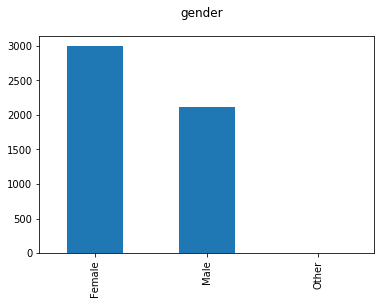

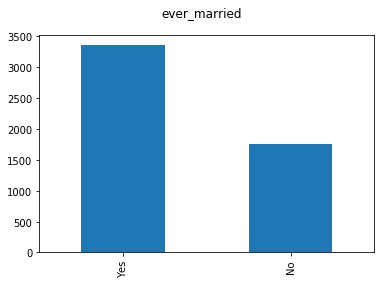

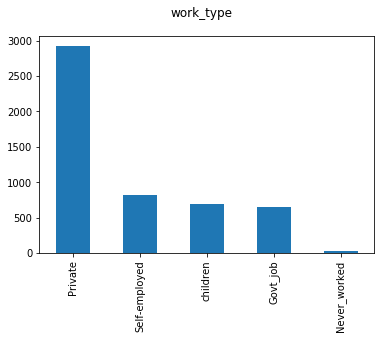

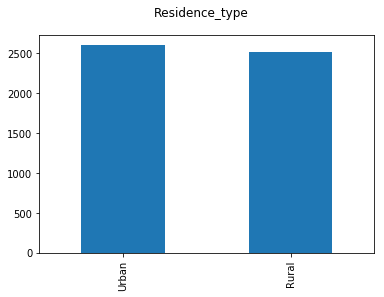

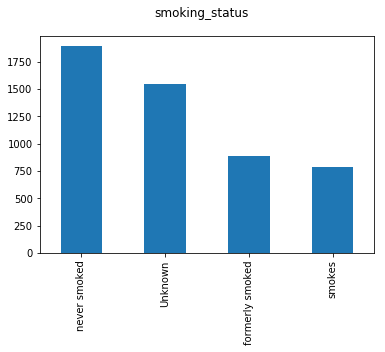

In [10]:
## Analysing Categorical Variables for conversion using function(from Self written)
# Below custom made function will show bar graph of all non numeric variables
data_cat(df)

In [8]:
# Checking Gender if other is significant no then select appropriate conversion methon else simple binary
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
# Since Other in gender in only one so droping row with other.(Using method from template)
df = row_drop(df,'Other','gender')
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

Based on visual analysis we can now easily select appropriate conversion method.
Following varibales need to be converted to different classes.
### To Binary:
    gender 
    ever_married 
    Residence_type 

### To Categorcal coding
    work_type

### To Ordinal
    smoking_status
    
### Output variable 
    stroke

In [10]:
# Variable with Yes/No, Rural/Urban or Male/Female can be converted to binary 
df = cat_num(df,['ever_married'],coding_type = 'binary',contain='Yes')
df = cat_num(df,['gender'],coding_type = 'binary',contain='Male')
df = cat_num(df,['Residence_type'],coding_type = 'binary',contain='Urban')

In [11]:
# Variable with yes No can be converted to Categorical coding 
df = cat_num(df,['work_type'],coding_type = 'label')

In [12]:
# Variable order can be converted to Ordinal 
encode = [['Unknown', 0], ['never smoked', 1], ['formerly smoked', 2], ['smokes', 3]]
df = cat_num(df,['smoking_status'],coding_type = 'ordinal',X =encode)

In [13]:
df_details(df,5)

Data Types of Column: 
 gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type               int8
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke                 int64
dtype: object

 Size of Datarame:  (5109, 11)

 Top and bottom  5  rows: 



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,70.0,0,0,1,2,1,91.25,36.0,0.0,0
1,1,36.0,0,0,1,2,1,77.26,30.9,2.0,0
2,0,31.0,0,0,1,0,1,88.20,22.7,2.0,0
3,1,57.0,0,1,1,3,1,92.82,27.8,1.0,0
4,1,59.0,0,0,1,2,1,93.58,25.1,3.0,0
5105,0,80.0,0,0,1,2,1,64.44,45.0,2.0,1
5106,0,50.0,0,0,1,0,1,104.24,32.8,0.0,0
5107,0,64.0,0,0,1,2,0,75.13,31.1,1.0,0
5108,0,34.0,0,0,1,2,0,231.50,45.4,2.0,0
5109,0,39.0,0,0,1,2,0,103.12,29.9,1.0,0


In [14]:
#Checking if any missing values
miss_ch(df)

Available data with no nulls:  5109


'Deatils of Null values column wise'

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
## Moving Output variable to first position as with previous datasets.
first_col = df.pop('stroke')
df.insert(0, 'stroke', first_col)
df.head(5)

,stroke,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,1,41.0,0,0,1,2,1,223.78,32.30,2.0
1,0,1,9.0,0,0,0,4,1,150.00,17.40,0.0
2,0,0,33.0,0,0,0,2,1,84.40,26.85,3.0
3,0,1,5.0,0,0,0,4,1,70.00,18.60,0.0
4,0,0,13.0,0,0,0,4,0,93.30,25.90,0.0


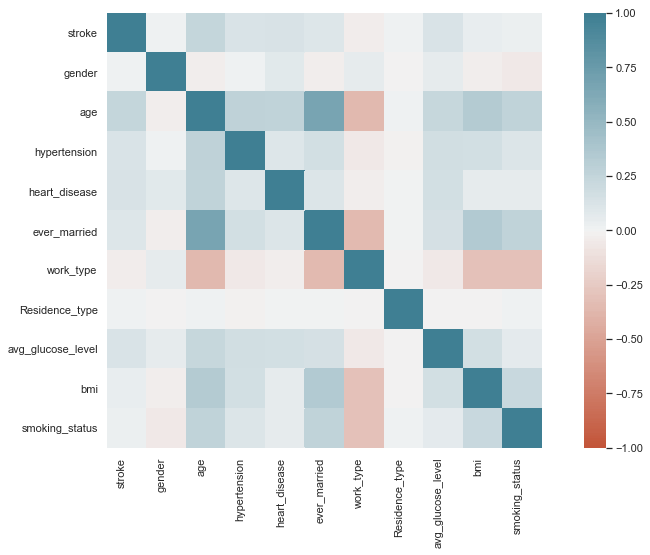

In [19]:
## Calling corellation heat map funtion but useless since too many features
corr_hmap(df)

### Checking the Class balance
As these types of problems have usually class imbalnce issue.

In [20]:
df.dtypes

stroke                 int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type               int8
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
dtype: object

In [21]:
# Checking the no of rows in each class
print('Stroke Yes count: ',row_drop(df,0,'stroke')['stroke'].count())
print('Stroke No count: ',row_drop(df,1,'stroke')['stroke'].count())

Stroke Yes count:  249
Stroke No count:  4860


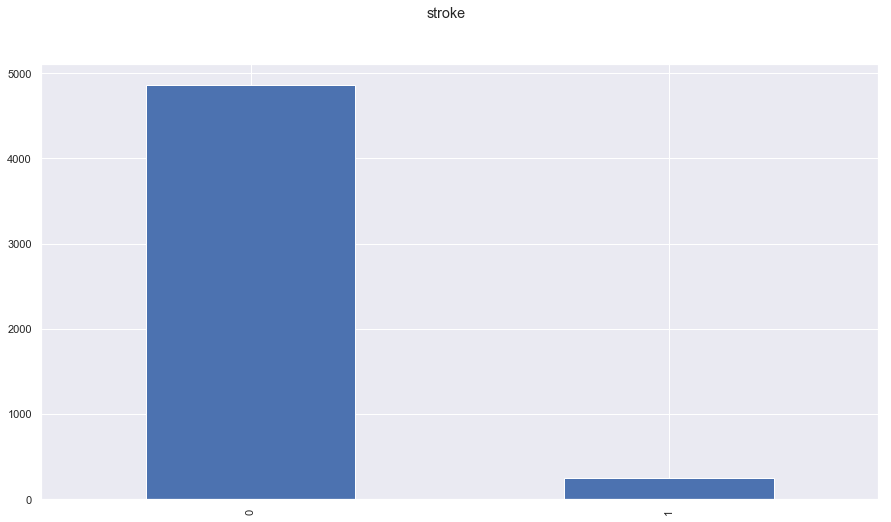

In [22]:
data_cat(col_dtype(df,['stroke'],dtyp = 'category'),col_int=['stroke'])

# - 
Although there is a considerable class imbalance, more data points for negative class(no stroke) with positive class only around 5%.
First  check without sampling.

### No need for feature selection as already features are less
### Using Random Forest 


In [31]:
x = col_drop(df,['stroke'],typ=0)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [32]:
# Calling Mexhinge Learning method with different algorothms of classification and regression
cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)

'Classification Report'

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1602
           1       0.09      0.04      0.05        84

    accuracy                           0.93      1686
   macro avg       0.52      0.51      0.51      1686
weighted avg       0.91      0.93      0.92      1686

Accuracy on Train Data is:  93.29774614472124 %
AUC score is:  0.5078696272516497
Logloss is:  2.3148916487204474


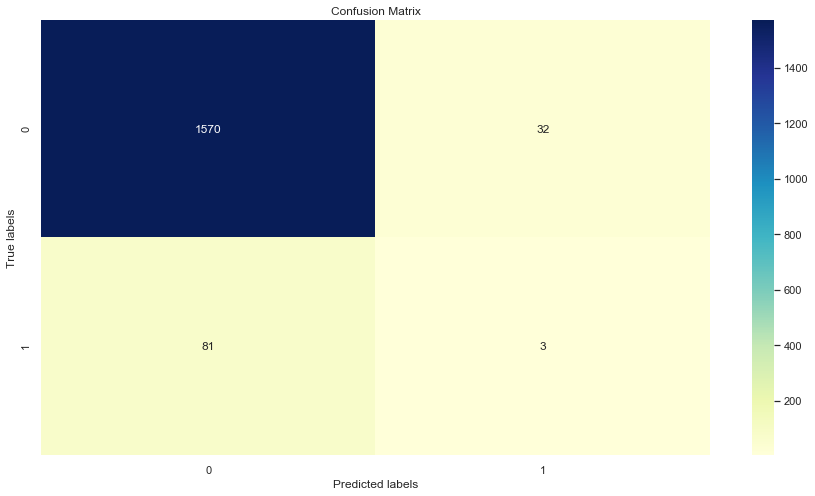

In [33]:
con_mat(cm,['0','1'])
display("Classification Report")
print(cr)
print("Accuracy on Train Data is: ",acc*100,"%")
print("AUC score is: ",auc)
print("Logloss is: ",ll)

#### Model performace is extremely bad on positive class its unable to learn ths class due to very few rows as visible in F1 score for positive class and confusion matrix but overall accuracy in 94% due to the large class imbalance

## Trying by balancing the class

In [54]:
## Upsampling minority class and down sampling majority class 
from sklearn.utils import resample
df_majority = df[df['stroke']==0]
df_minority = df[df['stroke']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2500,    # to match majority class
                                 random_state=123) # reproducible results
df_majority_under = resample(df_majority, 
                                replace=False,     # sample with replacement
                                n_samples=4000,    # to match majority class
                                random_state=123) # reproducible results
# Combine majority class with upsampled minority class
df_smp = pd.concat([df_majority_under, df_minority_upsampled])
# Display new class counts
df_smp['stroke'].value_counts()

0    4000
1    2500
Name: stroke, dtype: int64

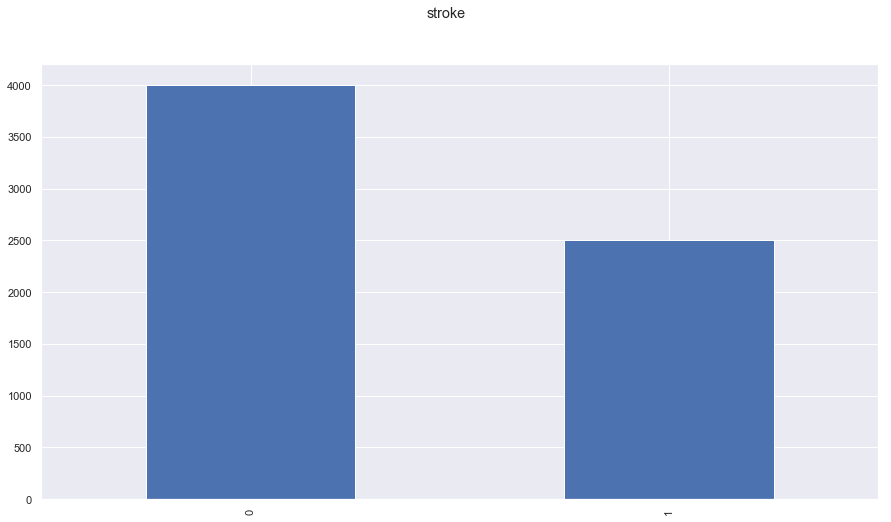

In [35]:
data_cat(col_dtype(df_smp,['stroke'],dtyp = 'category'),col_int=['stroke'])

'Classification Report'

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1330
           1       0.90      1.00      0.95       815

    accuracy                           0.96      2145
   macro avg       0.95      0.97      0.96      2145
weighted avg       0.96      0.96      0.96      2145

Accuracy on Train Data is:  95.8974358974359 %
AUC score is:  0.9664421790673002
Logloss is:  1.417007500294237


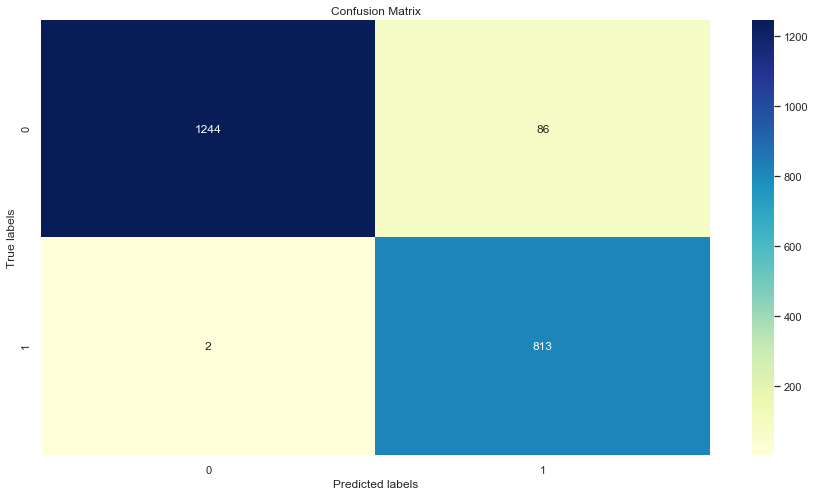

In [37]:
x = col_drop(df_smp,['stroke'],typ=0)
y = df_smp['stroke']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# Calling Mexhinge Learning method with different algorothms of classification and regression
cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
con_mat(cm,['0','1'])
display("Classification Report")
print(cr)
print("Accuracy on Train Data is: ",acc*100,"%")
print("AUC score is: ",auc)
print("Logloss is: ",ll)                                                    

#### By upsampling the minority class and down sampling majority class overall accuracy change  a little bit but  positive class accuracy increased.

## Applying different Classification Algorithms and Comparing Results
ALL reslts compiled on excel

knn
Precision:  17.94871794871795
Recall:  8.333333333333332
AUC score is:  0.5316791510611735
Accuracy on Test Data is:  93.53499406880191 %


<Figure size 1080x576 with 0 Axes>

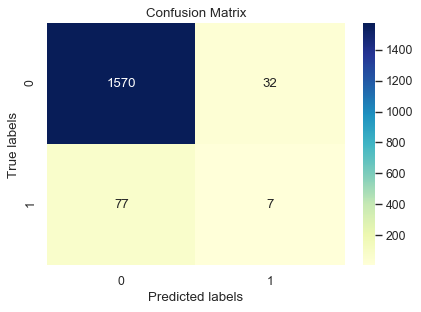


naive
Precision:  11.386138613861387
Recall:  27.380952380952383
AUC score is:  0.5810370964865347
Accuracy on Test Data is:  85.76512455516014 %


<Figure size 1080x576 with 0 Axes>

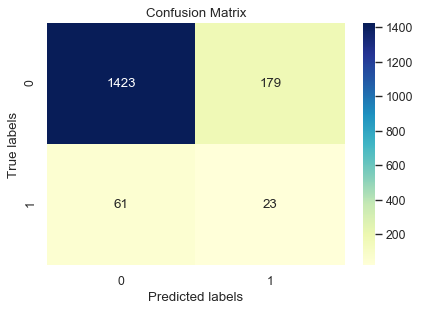


logit
Precision:  50.0
Recall:  2.380952380952381
AUC score is:  0.5112805421794185
Accuracy on Test Data is:  95.01779359430606 %


<Figure size 1080x576 with 0 Axes>

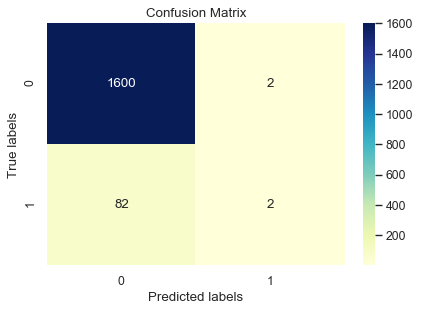


mlp
Precision:  0.0
Recall:  0.0
AUC score is:  0.499063670411985
Accuracy on Test Data is:  94.83985765124555 %


<Figure size 1080x576 with 0 Axes>

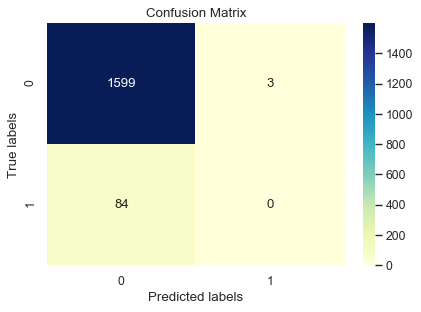


svc
Precision:  0.0
Recall:  0.0
AUC score is:  0.5
Accuracy on Test Data is:  95.01779359430606 %


<Figure size 1080x576 with 0 Axes>

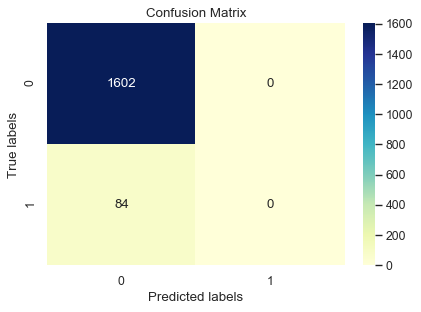


decisiontree
Precision:  0.0
Recall:  0.0
AUC score is:  0.49968789013732834
Accuracy on Test Data is:  94.95848161328588 %


<Figure size 1080x576 with 0 Axes>

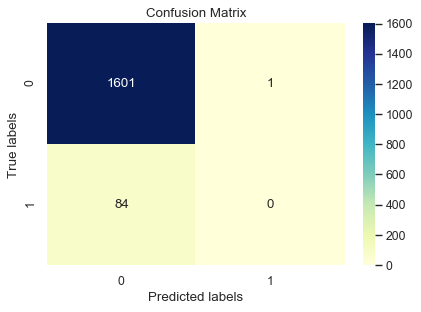


randomforest
Precision:  19.047619047619047
Recall:  9.523809523809524
AUC score is:  0.5370073122882112
Accuracy on Test Data is:  93.47568208778173 %


<Figure size 1080x576 with 0 Axes>

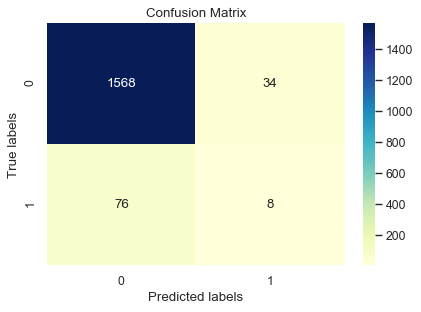


[00:27:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Precision:  0.0
Recall:  0.0
AUC score is:  0.49968789013732834
Accuracy on Test Data is:  94.95848161328588 %


<Figure size 1080x576 with 0 Axes>

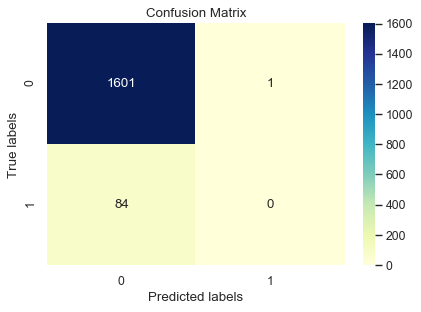


adaboost
Precision:  25.0
Recall:  2.380952380952381
AUC score is:  0.5100321027287319
Accuracy on Test Data is:  94.78054567022538 %


<Figure size 1080x576 with 0 Axes>

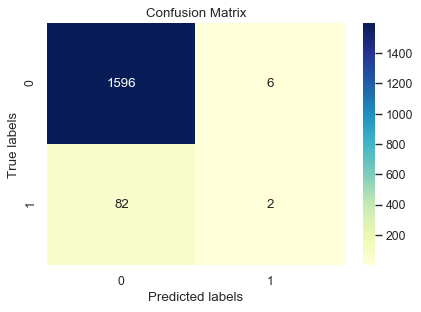


gboost
Precision:  20.0
Recall:  1.1904761904761905
AUC score is:  0.5047039415016943
Accuracy on Test Data is:  94.83985765124555 %


<Figure size 1080x576 with 0 Axes>

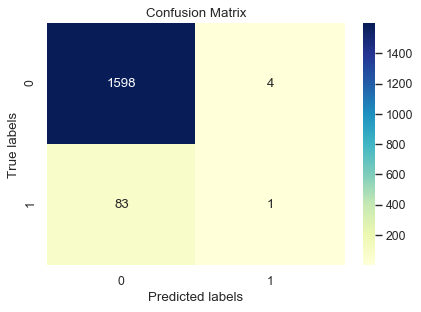

In [43]:
all_algo = ['knn','naive','logit','mlp','svc', 'decisiontree','randomforest','xgboost','adaboost','gboost']

i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['stroke'],algor=alg,fs=False,cv=False,ci=False)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

knn
Precision:  87.31631417000139
Recall:  100.0
AUC score is:  0.09212454212454213
Accuracy on Test Data is:  92.72096885442404 %


<Figure size 1080x576 with 0 Axes>

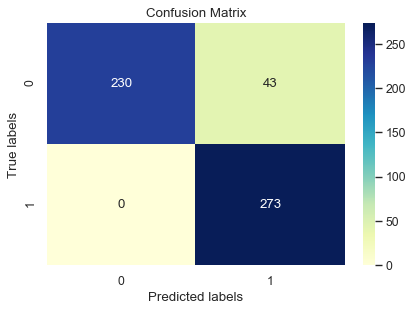


naive
Precision:  72.64026448721286
Recall:  85.99235314563781
AUC score is:  0.07857142857142856
Accuracy on Test Data is:  76.77381119794282 %


<Figure size 1080x576 with 0 Axes>

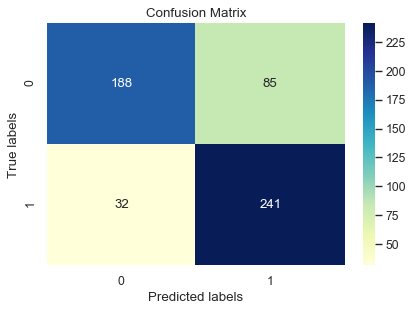


logit
Precision:  74.26284481774675
Recall:  80.43394561642738
AUC score is:  0.07728937728937729
Accuracy on Test Data is:  76.26182775177291 %


<Figure size 1080x576 with 0 Axes>

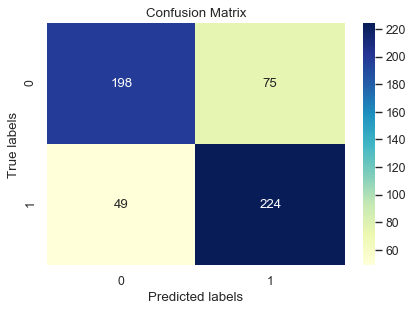


mlp
Precision:  70.47616449326081
Recall:  75.53193764872597
AUC score is:  0.07692307692307691
Accuracy on Test Data is:  71.92883594163303 %


<Figure size 1080x576 with 0 Axes>

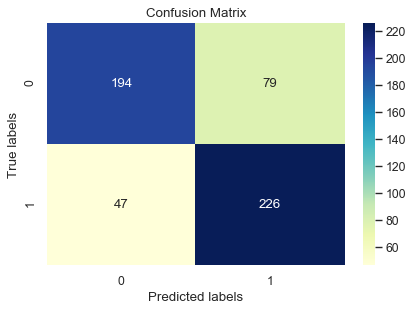


svc
Precision:  73.19196058758821
Recall:  79.88556455709741
AUC score is:  0.07692307692307693
Accuracy on Test Data is:  75.29250457038391 %


<Figure size 1080x576 with 0 Axes>

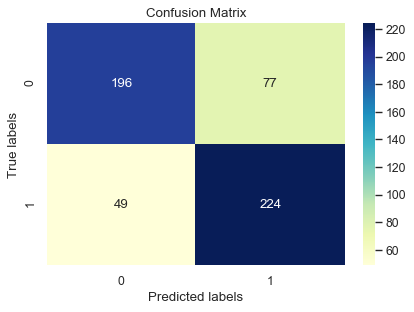


decisiontree
Precision:  75.51416702843295
Recall:  77.28763936793132
AUC score is:  0.07765567765567766
Accuracy on Test Data is:  75.93306145408522 %


<Figure size 1080x576 with 0 Axes>

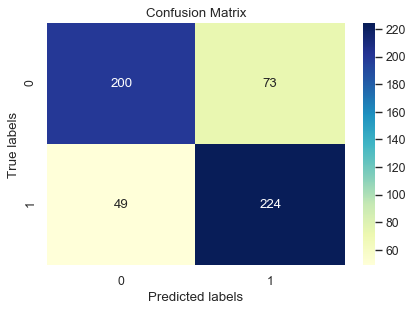


randomforest
Precision:  91.77250019158245
Recall:  100.0
AUC score is:  0.09523809523809523
Accuracy on Test Data is:  95.50073327038591 %


<Figure size 1080x576 with 0 Axes>

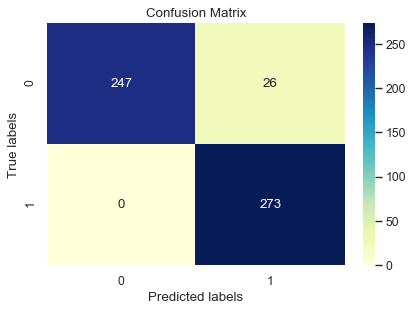


[00:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

<Figure size 1080x576 with 0 Axes>

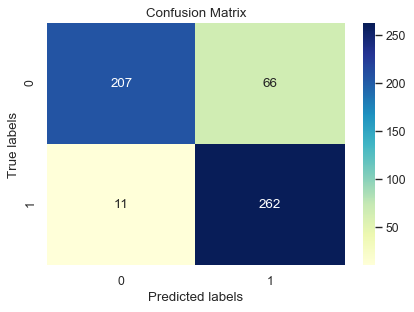


adaboost
Precision:  75.35877452962093
Recall:  88.47758081334725
AUC score is:  0.08095238095238097
Accuracy on Test Data is:  79.75463902337759 %


<Figure size 1080x576 with 0 Axes>

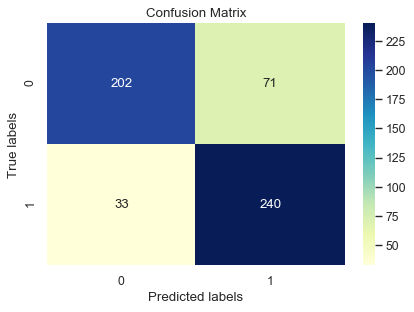


gboost
Precision:  79.25024613683578
Recall:  92.8316087805139
AUC score is:  0.08516483516483515
Accuracy on Test Data is:  84.25343699566733 %


<Figure size 1080x576 with 0 Axes>

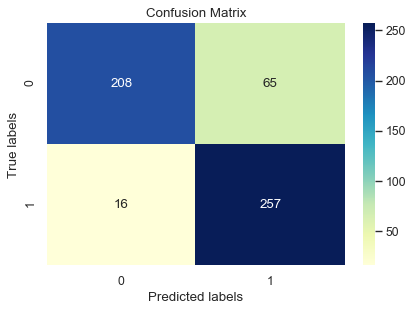

In [44]:

i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['stroke'],algor=alg,fs=True,cv=True,ci=True,resmpl = 0.75)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

knn
Precision:  12.5
Recall:  5.952380952380952
AUC score is:  0.5188380595683967
Accuracy on Test Data is:  93.23843416370107 %


<Figure size 1080x576 with 0 Axes>

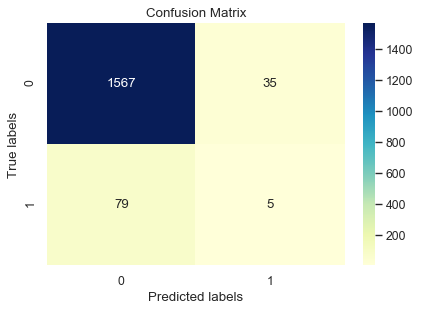


naive
Precision:  12.359550561797752
Recall:  13.095238095238097
AUC score is:  0.5411316211878009
Accuracy on Test Data is:  91.04389086595492 %


<Figure size 1080x576 with 0 Axes>

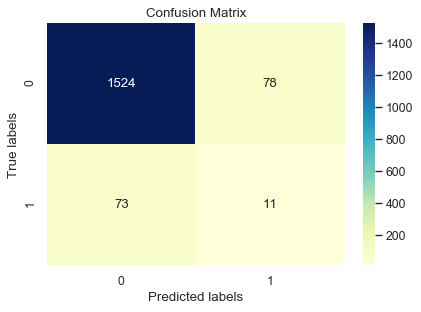


logit
Precision:  0.0
Recall:  0.0
AUC score is:  0.5
Accuracy on Test Data is:  95.01779359430606 %


<Figure size 1080x576 with 0 Axes>

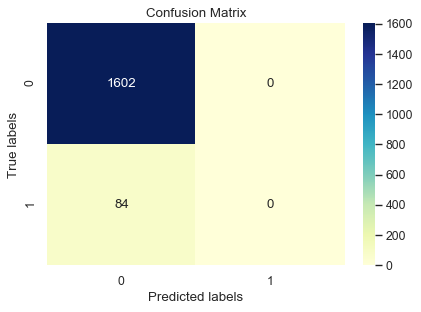


mlp
Precision:  0.0
Recall:  0.0
AUC score is:  0.5
Accuracy on Test Data is:  95.01779359430606 %


<Figure size 1080x576 with 0 Axes>

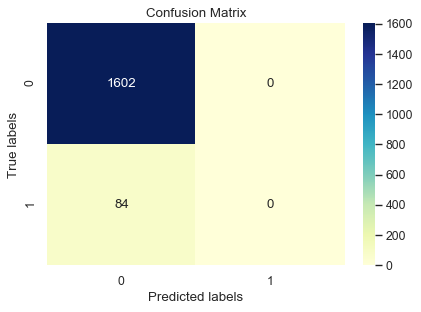


svc
Precision:  0.0
Recall:  0.0
AUC score is:  0.5
Accuracy on Test Data is:  95.01779359430606 %


<Figure size 1080x576 with 0 Axes>

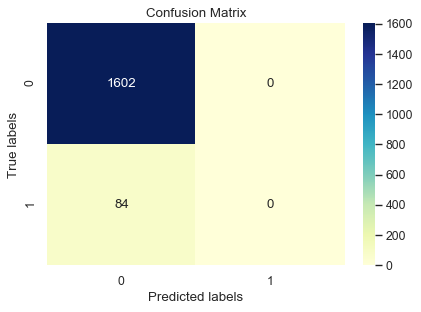


decisiontree
Precision:  0.0
Recall:  0.0
AUC score is:  0.49968789013732834
Accuracy on Test Data is:  94.95848161328588 %


<Figure size 1080x576 with 0 Axes>

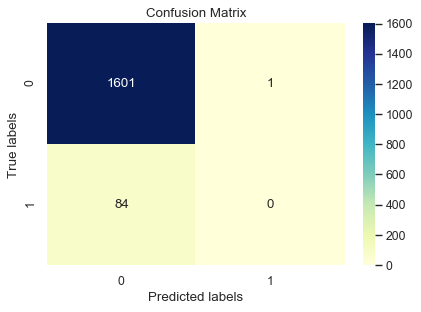


randomforest
Precision:  8.88888888888889
Recall:  4.761904761904762
AUC score is:  0.5110130194399858
Accuracy on Test Data is:  92.8232502965599 %


<Figure size 1080x576 with 0 Axes>

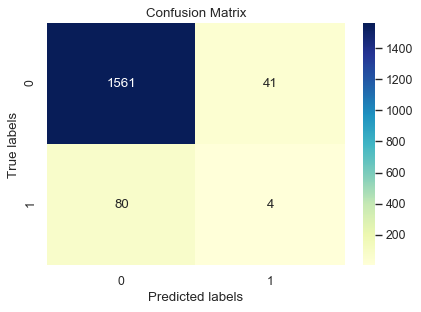


[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Precision:  0.0
Recall:  0.0
AUC score is:  0.49875156054931336
Accuracy on Test Data is:  94.78054567022538 %


<Figure size 1080x576 with 0 Axes>

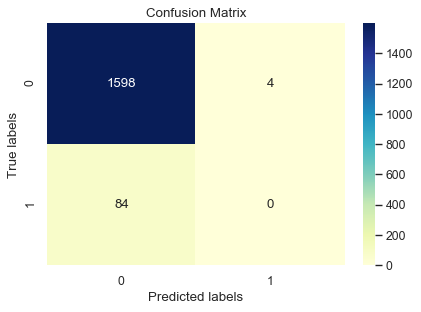


adaboost
Precision:  0.0
Recall:  0.0
AUC score is:  0.49968789013732834
Accuracy on Test Data is:  94.95848161328588 %


<Figure size 1080x576 with 0 Axes>

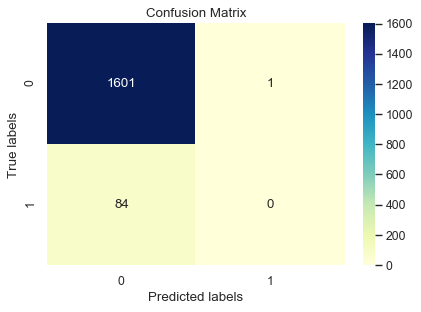


gboost
Precision:  11.11111111111111
Recall:  1.1904761904761905
AUC score is:  0.5034555020510076
Accuracy on Test Data is:  94.60260972716489 %


<Figure size 1080x576 with 0 Axes>

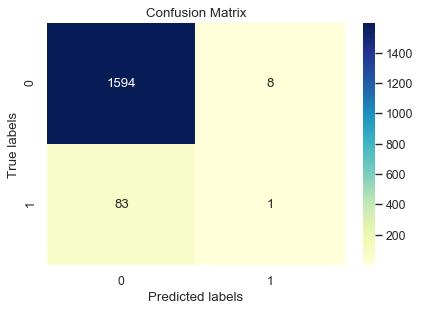

In [49]:


i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['stroke'],algor=alg,fs=True,cv=False,ci=False,resmpl = 0.75)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

knn
Precision:  84.46139180171592
Recall:  99.66254218222723
AUC score is:  0.9093389117844985
Accuracy on Test Data is:  90.803324099723 %


<Figure size 1080x576 with 0 Axes>

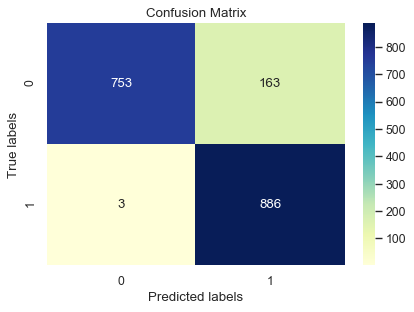


naive
Precision:  72.57203842049093
Recall:  76.4904386951631
AUC score is:  0.7421683506810558
Accuracy on Test Data is:  74.18282548476455 %


<Figure size 1080x576 with 0 Axes>

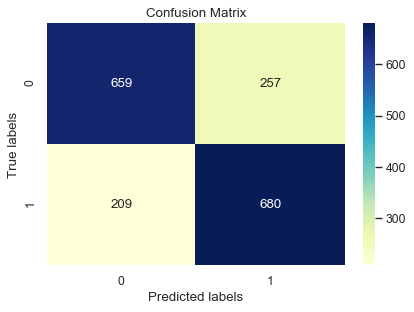


logit
Precision:  74.22360248447205
Recall:  80.65241844769405
AUC score is:  0.7673450616707846
Accuracy on Test Data is:  76.67590027700831 %


<Figure size 1080x576 with 0 Axes>

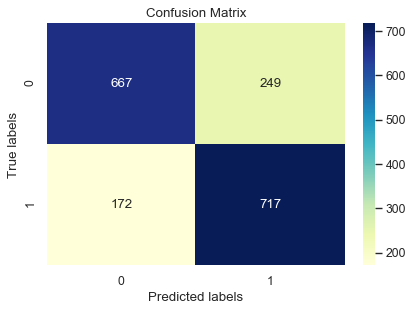


mlp
Precision:  72.2462203023758
Recall:  75.25309336332958
AUC score is:  0.7359816240218882
Accuracy on Test Data is:  73.57340720221607 %


<Figure size 1080x576 with 0 Axes>

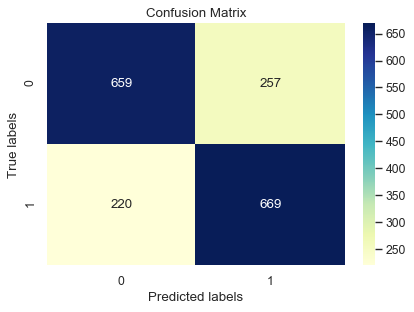


svc
Precision:  72.0528455284553
Recall:  79.7525309336333
AUC score is:  0.7486534843624896
Accuracy on Test Data is:  74.79224376731301 %


<Figure size 1080x576 with 0 Axes>

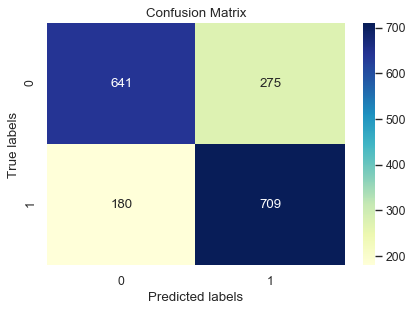


decisiontree
Precision:  74.23312883435584
Recall:  81.66479190101236
AUC score is:  0.7707693743522235
Accuracy on Test Data is:  77.00831024930747 %


<Figure size 1080x576 with 0 Axes>

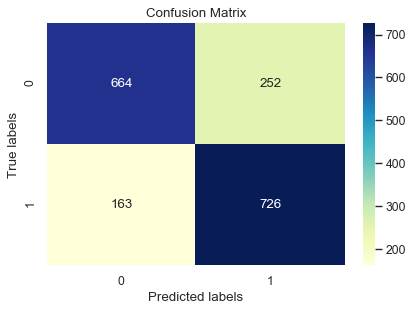


randomforest
Precision:  89.67611336032388
Recall:  99.66254218222723
AUC score is:  0.9426358550159395
Accuracy on Test Data is:  94.18282548476455 %


<Figure size 1080x576 with 0 Axes>

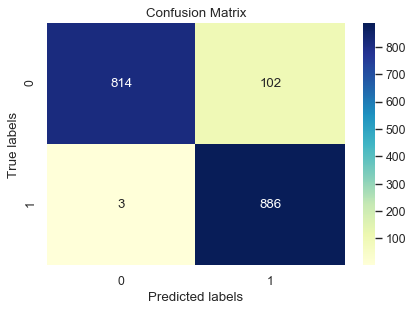


[01:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Precision:  77.99086757990867
Recall:  96.06299212598425
AUC score is:  0.8487647422893101
Accuracy on Test Data is:  84.70914127423823 %


<Figure size 1080x576 with 0 Axes>

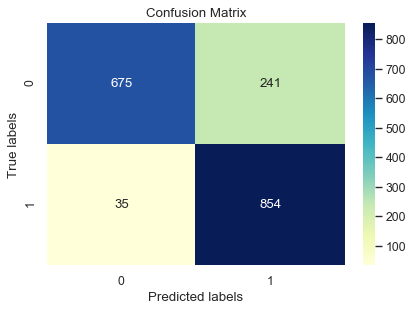


adaboost
Precision:  74.88284910965324
Recall:  89.87626546681665
AUC score is:  0.8030931177270964
Accuracy on Test Data is:  80.16620498614958 %


<Figure size 1080x576 with 0 Axes>

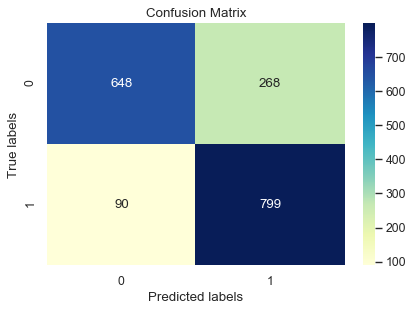


gboost
Precision:  78.544061302682
Recall:  92.2384701912261
AUC score is:  0.8389216085980518
Accuracy on Test Data is:  83.76731301939057 %


<Figure size 1080x576 with 0 Axes>

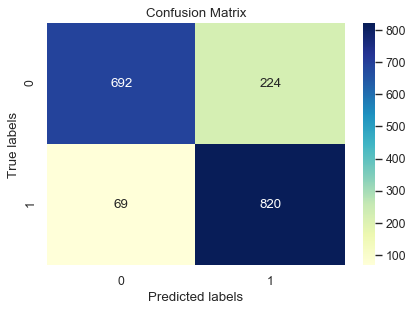

In [51]:
i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['stroke'],algor=alg,fs=False,cv=False,ci=True,resmpl = 0.75)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

knn
Precision:  17.94871794871795
Recall:  8.333333333333332
AUC score is:  0.5316791510611735
Accuracy on Test Data is:  93.53499406880191 %


<Figure size 1080x576 with 0 Axes>

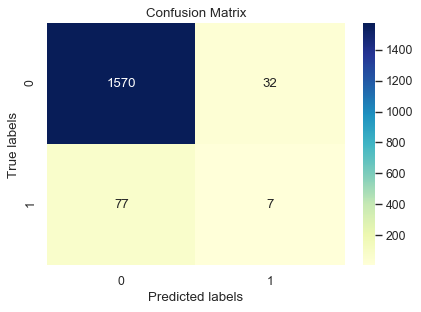


naive
Precision:  11.386138613861387
Recall:  27.380952380952383
AUC score is:  0.5810370964865347
Accuracy on Test Data is:  85.76512455516014 %


<Figure size 1080x576 with 0 Axes>

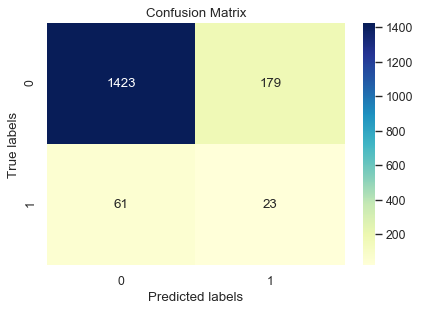


logit
Precision:  50.0
Recall:  2.380952380952381
AUC score is:  0.5112805421794185
Accuracy on Test Data is:  95.01779359430606 %


<Figure size 1080x576 with 0 Axes>

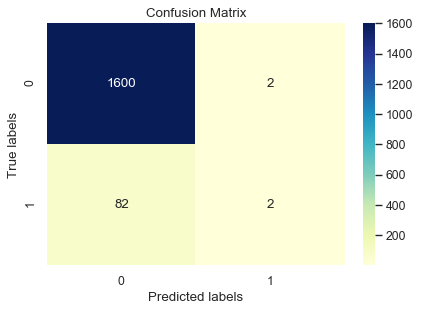


mlp
Precision:  66.66666666666666
Recall:  2.380952380952381
AUC score is:  0.5115926520420903
Accuracy on Test Data is:  95.07710557532621 %


<Figure size 1080x576 with 0 Axes>

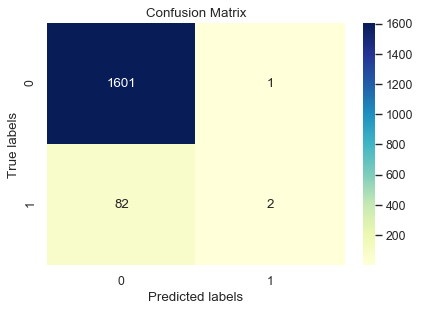


svc
Precision:  0.0
Recall:  0.0
AUC score is:  0.5
Accuracy on Test Data is:  95.01779359430606 %


<Figure size 1080x576 with 0 Axes>

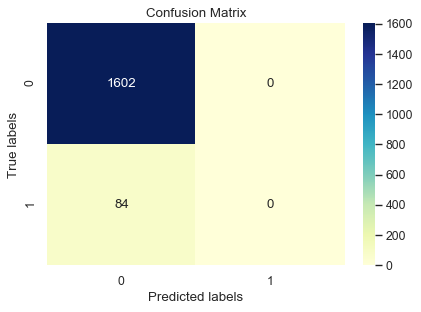


decisiontree
Precision:  0.0
Recall:  0.0
AUC score is:  0.49968789013732834
Accuracy on Test Data is:  94.95848161328588 %


<Figure size 1080x576 with 0 Axes>

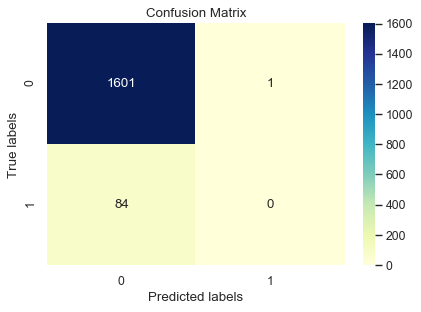


randomforest
Precision:  17.647058823529413
Recall:  7.142857142857142
AUC score is:  0.5269752095594792
Accuracy on Test Data is:  93.7129300118624 %


<Figure size 1080x576 with 0 Axes>

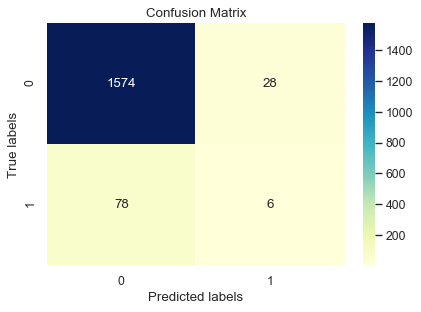


[01:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Precision:  0.0
Recall:  0.0
AUC score is:  0.49968789013732834
Accuracy on Test Data is:  94.95848161328588 %


<Figure size 1080x576 with 0 Axes>

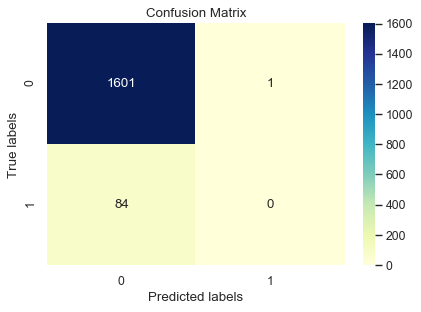


adaboost
Precision:  25.0
Recall:  2.380952380952381
AUC score is:  0.5100321027287319
Accuracy on Test Data is:  94.78054567022538 %


<Figure size 1080x576 with 0 Axes>

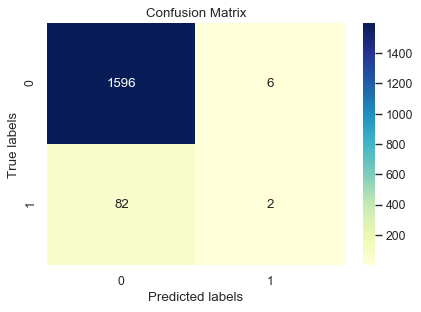


gboost
Precision:  20.0
Recall:  1.1904761904761905
AUC score is:  0.5047039415016943
Accuracy on Test Data is:  94.83985765124555 %


<Figure size 1080x576 with 0 Axes>

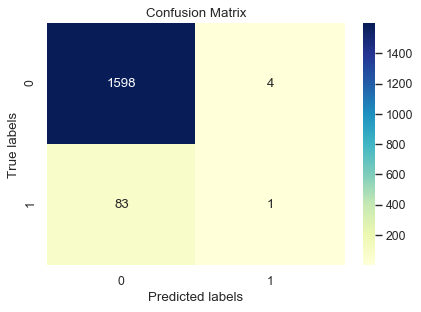

In [53]:
i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['stroke'],algor=alg,fs=False,cv=True,ci=False,resmpl = 0.75)
    print(alg)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

## Finetuning and Comparing Results

Majority class resampled:  4500 Minority class resampled:  2000
Precision:  94.81012658227847
Recall:  100.0
AUC score is:  0.9366306027820711
Accuracy on Test Data is:  96.17715617715618 %


<Figure size 432x288 with 0 Axes>

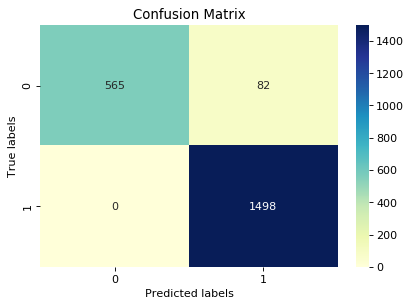


Majority class resampled:  4000 Minority class resampled:  2000
Precision:  92.93785310734464
Recall:  100.0
AUC score is:  0.924698795180723
Accuracy on Test Data is:  94.94949494949495 %


<Figure size 432x288 with 0 Axes>

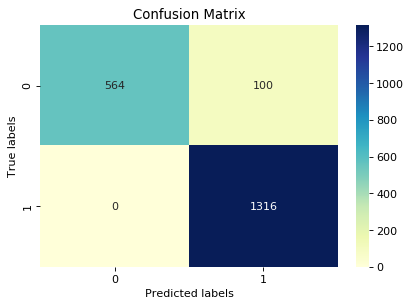


Majority class resampled:  3500 Minority class resampled:  2000
Precision:  93.3931484502447
Recall:  100.0
AUC score is:  0.9395522388059702
Accuracy on Test Data is:  95.53719008264463 %


<Figure size 432x288 with 0 Axes>

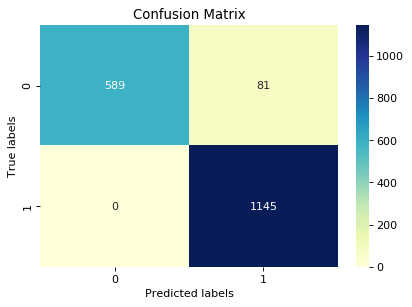


Majority class resampled:  3000 Minority class resampled:  2000
Precision:  91.40698772426818
Recall:  100.0
AUC score is:  0.9332844574780059
Accuracy on Test Data is:  94.48484848484848 %


<Figure size 432x288 with 0 Axes>

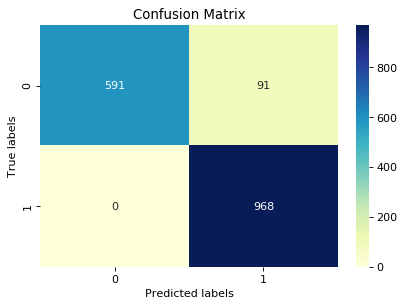


Majority class resampled:  3000 Minority class resampled:  3000
Precision:  90.90047393364928
Recall:  100.0
AUC score is:  0.9529872673849167
Accuracy on Test Data is:  95.15151515151516 %


<Figure size 432x288 with 0 Axes>

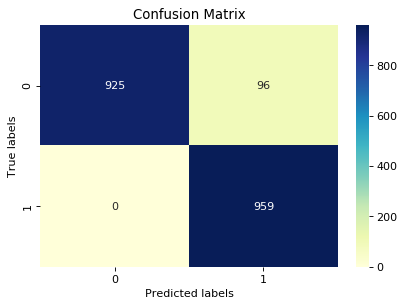


Majority class resampled:  4500 Minority class resampled:  3000
Precision:  94.69987228607918
Recall:  100.0
AUC score is:  0.9581653225806452
Accuracy on Test Data is:  96.64646464646465 %


<Figure size 432x288 with 0 Axes>

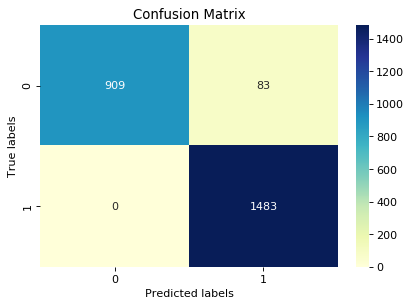

In [19]:
## Changing Class balance and checking resuts
majl = [4500,4000,3500,3000,3000,4500]
minrl = [2000,2000,2000,2000,3000,3000]
all_algo = ['knn','naive','logit','mlp','svc', 'decisiontree','randomforest','xgboost','adaboost','gboost']
colum=['stroke']
for i in range(0,6):
    df_smp = class_imbalance_no(df,minr=majl[i],maj=minrl[i],minor=0,col=colum)
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    x = col_drop(df_smp,colum,typ=0)
    y = df_smp[colum]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
    print("Majority class resampled: ",majl[i],"Minority class resampled: ",minrl[i])
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
#data_cat(col_dtype(df_smp,['Bankrupt?'],dtyp = 'category'),col_int=['Bankrupt?'])

[22:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  4500 Minority class resampled:  2000
Precision:  86.89095127610209
Recall:  100.0
AUC score is:  0.8253477588871716
Accuracy on Test Data is:  89.46386946386946 %


<Figure size 432x288 with 0 Axes>

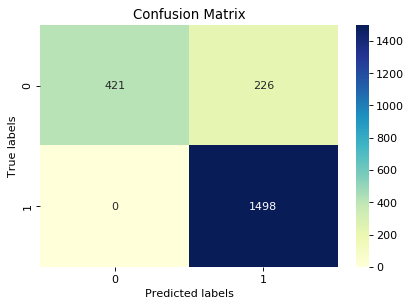


[22:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  4000 Minority class resampled:  2000
Precision:  85.06787330316742
Recall:  100.0
AUC score is:  0.8260542168674698
Accuracy on Test Data is:  88.33333333333333 %


<Figure size 432x288 with 0 Axes>

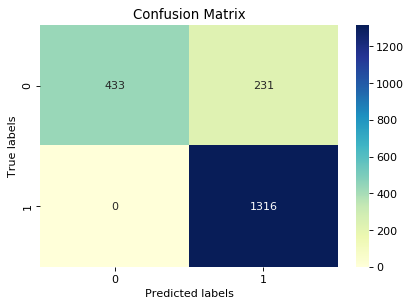


[22:49:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  3500 Minority class resampled:  2000
Precision:  84.54680534918276
Recall:  99.3886462882096
AUC score is:  0.8417193508440332
Accuracy on Test Data is:  88.1542699724518 %


<Figure size 432x288 with 0 Axes>

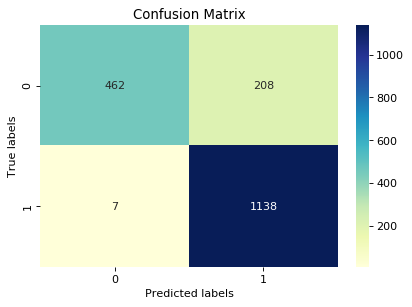


[22:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  3000 Minority class resampled:  2000
Precision:  82.59005145797599
Recall:  99.48347107438018
AUC score is:  0.84859037589976
Accuracy on Test Data is:  87.39393939393939 %


<Figure size 432x288 with 0 Axes>

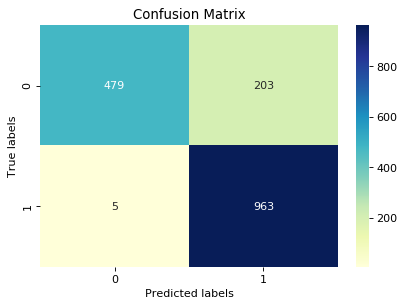


[22:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  3000 Minority class resampled:  3000
Precision:  77.18120805369128
Recall:  95.9332638164755
AUC score is:  0.8464635766729749
Accuracy on Test Data is:  84.2929292929293 %


<Figure size 432x288 with 0 Axes>

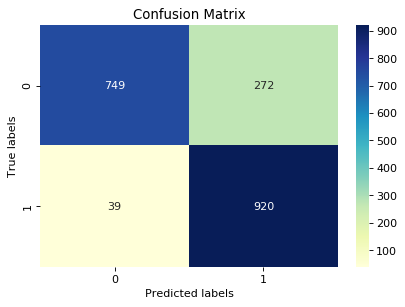


[22:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Majority class resampled:  4500 Minority class resampled:  4000
Precision:  81.94905869324474
Recall:  98.40425531914893
AUC score is:  0.8667330367802183
Accuracy on Test Data is:  87.5222816399287 %


<Figure size 432x288 with 0 Axes>

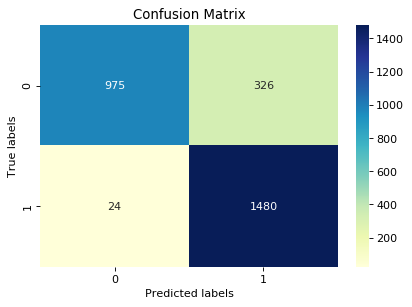

In [17]:
for i in range(0,6):
    df_smp = class_imbalance_no(df,minr=majl[i],maj=minrl[i],minor=0,col=colum)
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    x = col_drop(df_smp,colum,typ=0)
    y = df_smp[colum]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'xgboost',task = 'Class',n=3)
    print("Majority class resampled: ",majl[i],"Minority class resampled: ",minrl[i])
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()

#### Best Combination 4500 majority class and 3000 minority class, in all cases Random forest performed well as compared to second best XGboost
#### Now checking for optimum no of features

No of Features  1
Precision:  79.79555021046302
Recall:  89.4807821982468
AUC score is:  0.7780490722815566
Accuracy on Test Data is:  80.12121212121212 %


<Figure size 432x288 with 0 Axes>

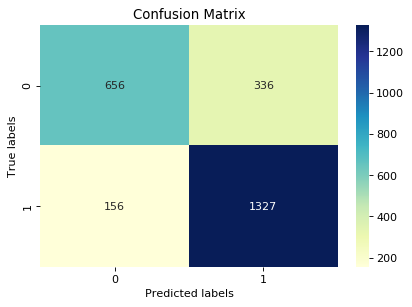


No of Features  2
Precision:  77.5767543859649
Recall:  95.4146999325691
AUC score is:  0.7709243061144584
Accuracy on Test Data is:  80.72727272727272 %


<Figure size 432x288 with 0 Axes>

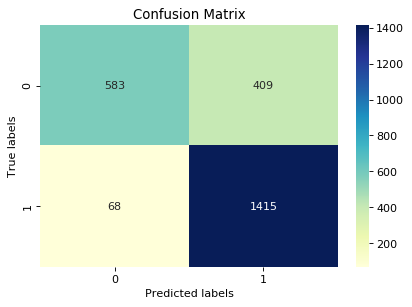


No of Features  3
Precision:  93.74209860935525
Recall:  100.0
AUC score is:  0.9501008064516129
Accuracy on Test Data is:  96.0 %


<Figure size 432x288 with 0 Axes>

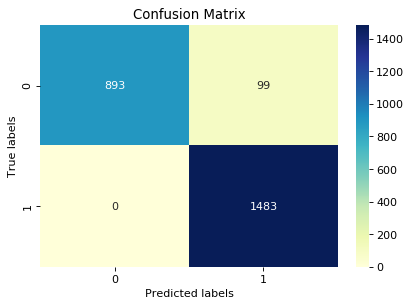


No of Features  4
Precision:  93.3291378225299
Recall:  100.0
AUC score is:  0.9465725806451614
Accuracy on Test Data is:  95.71717171717171 %


<Figure size 432x288 with 0 Axes>

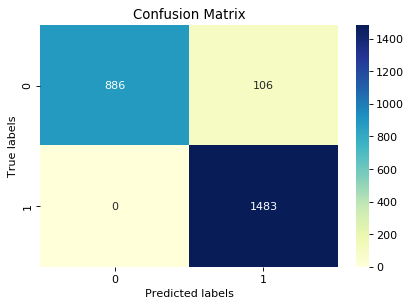


No of Features  5
Precision:  94.15873015873017
Recall:  100.0
AUC score is:  0.9536290322580645
Accuracy on Test Data is:  96.28282828282828 %


<Figure size 432x288 with 0 Axes>

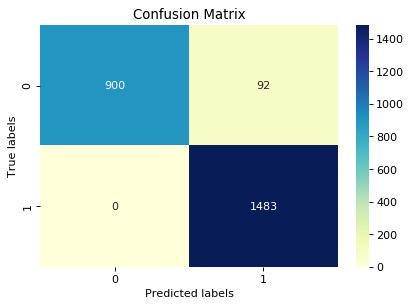


No of Features  6
Precision:  94.21855146124524
Recall:  100.0
AUC score is:  0.954133064516129
Accuracy on Test Data is:  96.32323232323232 %


<Figure size 432x288 with 0 Axes>

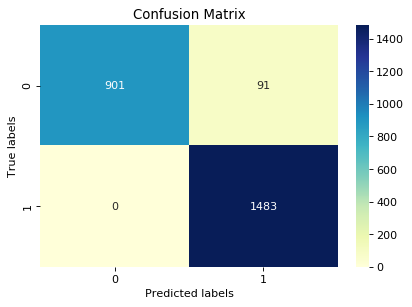


No of Features  7
Precision:  94.27844882390337
Recall:  100.0
AUC score is:  0.9546370967741936
Accuracy on Test Data is:  96.36363636363636 %


<Figure size 432x288 with 0 Axes>

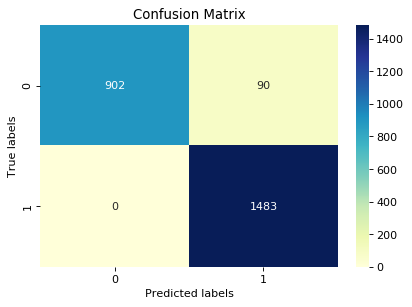


No of Features  8
Precision:  94.3384223918575
Recall:  100.0
AUC score is:  0.955141129032258
Accuracy on Test Data is:  96.4040404040404 %


<Figure size 432x288 with 0 Axes>

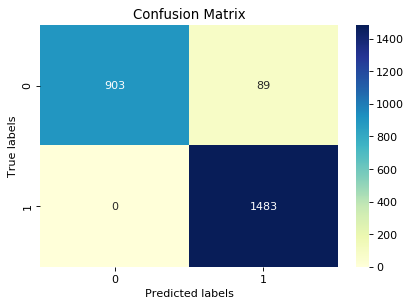


No of Features  9
Precision:  94.57908163265306
Recall:  100.0
AUC score is:  0.9571572580645161
Accuracy on Test Data is:  96.56565656565657 %


<Figure size 432x288 with 0 Axes>

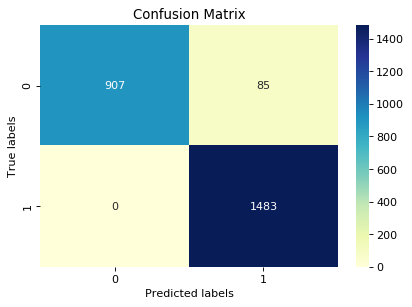

In [22]:
## Changing Class balance and checking resuts
all_algo = ['knn','naive','logit','mlp','svc', 'decisiontree','randomforest','xgboost','adaboost','gboost']
colum = ['stroke']
df_smp = class_imbalance_no(df,minr=4500,maj=3000,minor=0,col=colum)
for i in range(1,10):
    x,y,fs = feature_selectk(df_smp,f_s=i,col=colum)
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
    print("No of Features ", i)
    print("Precision: ",pre)
    print("Recall: ",recall)
    print("AUC score is: ",auc)
    print("Accuracy on Test Data is: ",acc*100,"%")
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()

Text(0, 0.5, 'Accuracy')

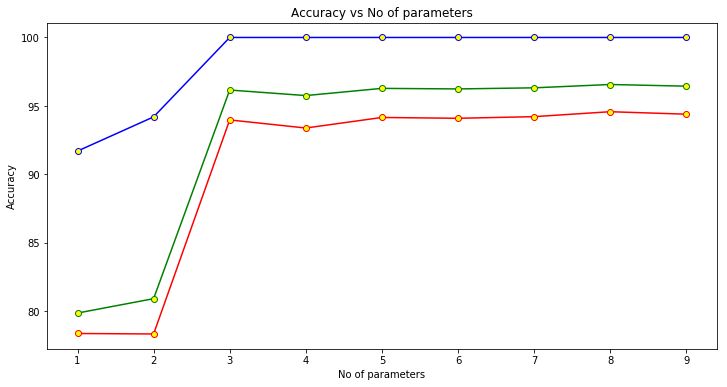

In [24]:
# Ploting graph to get optimum no of features.
accu = []
preu = []
recallu = []
# Calculating accuracy by selecting  1 to 22 no of parameters
for i in range(1, 10):
    x,y,fs = feature_selectk(df_smp,f_s=i,col=colum)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=3)
    acc = acc*100
    accu.append(acc)
    preu.append(pre)
    recallu.append(recall)
# Ploting K elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accu, color='green', markerfacecolor='yellow', marker='o')
plt.plot(range(1, 10), preu, color='red', markerfacecolor='yellow', marker='o')
plt.plot(range(1, 10), recallu, color='blue', markerfacecolor='yellow', marker='o')
plt.title('Accuracy vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('Accuracy')

### From the above graph of Accuracy, Precision and Recall over number of feature the optimum no is 5

Text(0, 0.5, 'Accuracy')

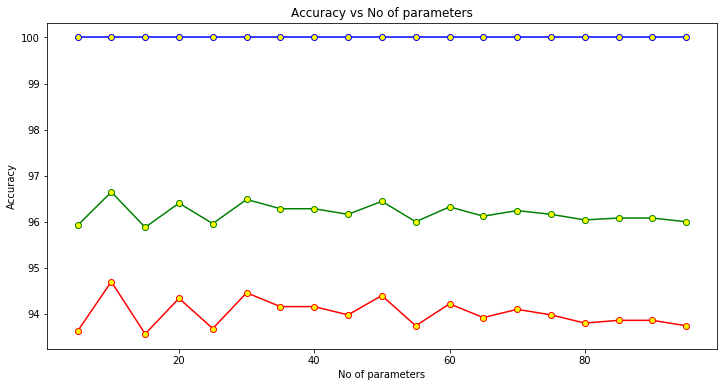

In [25]:
# Ploting graph to get optimum no of features.
accu = []
preu = []
recallu = []

x,y,fs = feature_selectk(df_smp,f_s=5,col=colum)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

for i in range(5, 100,5):
    cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=i)
    acc = acc*100
    accu.append(acc)
    preu.append(pre)
    recallu.append(recall)
# Ploting K elbow curve
plt.figure(figsize=(12, 6))
plt.plot(range(5, 100,5), accu, color='green', markerfacecolor='yellow', marker='o')
plt.plot(range(5, 100,5), preu, color='red', markerfacecolor='yellow', marker='o')
plt.plot(range(5, 100,5), recallu, color='blue', markerfacecolor='yellow', marker='o')
plt.title('Accuracy vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('Accuracy')

### From the above graph of Accuracy, Precision and Recall over no of trees  the optimum no is 10

Precision:  95.1250801796023
Recall:  100.0
AUC score is:  0.9616935483870968
Accuracy on Test Data is:  96.92929292929293 %


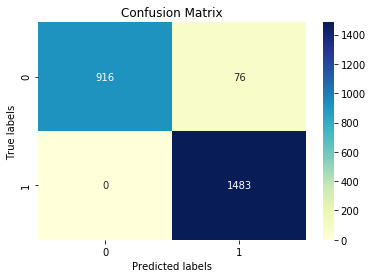

In [26]:
### Results after fine tuning
df_smp = class_imbalance_no(df,minr=4500,maj=3000,minor=0,col=['stroke'])
x,y,fs = feature_selectk(df_smp,f_s=5,col=colum)
cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = 'randomforest',task = 'Class',n=10)
print("Precision: ",pre)
print("Recall: ",recall)
print("AUC score is: ",auc)
print("Accuracy on Test Data is: ",acc*100,"%")
con_mat(cm,['0','1'])

### Methodology:
    - For feature selection ANOVA F-stats and RFFS method is used.
    - For class imbalance problem upsampling minority class and down sampling of majority class method is used.
    - For classification KNN, Random Forest, Multilayer perceptron, Xgbost,Adabostetc

### Final Results:
    -Optimum no of features is around 5
    -Accuracy as well as f1 score is increased by minimizing the class imbalance using up sampling of minority class.
    -BEst Model is Random Forest for this Problem